In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colordict = {
    "scDEF": "green",
    "scDEF_un": "lightgreen",
    "NMF": "blue",
    "scHPF": "darkblue",
    "Leiden": "violet",
    "scVI": "orange",
    "Harmony": "red",
    "Scanorama": "darkred",
    "nSBM": "teal",      
    "fscLVM": "goldenrod", 
}

metric_lims = {'Cell Type ARI': [0., 1.], 
            'Cell Type ASW': [-1., 1.], 
            'Batch ARI': [0., 1.], 
            'Batch ASW': [-1., 1.], 
            'Signature accuracy': [0., 1.], 
            'Signature sparsity': [0., 1.], 
            'Hierarchy accuracy': [0., 1.], 
            'Hierarchical signature consistency': [0., 1.]}

singlebatch_pairs = [
    ['Cell Type ARI', 'Cell Type ASW'],
    ['Signature accuracy', 'Signature sparsity'],
    ['Hierarchy accuracy', 'Hierarchical signature consistency'],
]

multibatch_pairs = [
    ['Cell Type ARI', 'Cell Type ASW'],
    ['Batch ARI', 'Batch ASW'],
    ['Signature accuracy', 'Signature sparsity'],
    ['Hierarchy accuracy', 'Hierarchical signature consistency'],
]


In [14]:
def _scatter_metrics(
    df, 
    metric_pairs, 
    nrows=1, 
    ncols=None, 
    figsize=None, 
    marker_shape='o', 
    marker_size=120, 
    alpha=0.8, 
    legend_title="Method"
):
    """
    Helper function to scatter plot metric pairs for each method.
    """
    if ncols is None:
        ncols = len(metric_pairs)
    if figsize is None:
        figsize = (6 * ncols, 5 * nrows)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    methods = df['method'].unique()
    legend_handles = {}
    for i, (y_metric, x_metric) in enumerate(metric_pairs):
        if i >= len(axes):
            break
        ax = axes[i]
        for m in methods:
            dfm = df[df['method'] == m]
            x_val = dfm[dfm['score'] == x_metric]['value'].values
            y_val = dfm[dfm['score'] == y_metric]['value'].values
            if len(x_val) > 0 and len(y_val) > 0:
                color = colordict.get(m, 'gray')
                sc = ax.scatter(
                    x_val,
                    y_val,
                    label=m,
                    marker=marker_shape,
                    color=color,
                    alpha=alpha,
                    edgecolor='k',
                    linewidth=0.5,
                    s=marker_size
                )
                # Only add one handle per method
                if m not in legend_handles:
                    legend_handles[m] = sc
        ax.set_xlabel(x_metric, fontsize=18)
        ax.set_ylabel(y_metric, fontsize=18)
        if x_metric in metric_lims:
            ax.set_xlim(metric_lims[x_metric])
        if y_metric in metric_lims:
            ax.set_ylim(metric_lims[y_metric])
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=15)
    # Remove unused axes
    for j in range(len(metric_pairs), nrows * ncols):
        fig.delaxes(axes[j])
    # Make a single legend outside the plots, bigger font
    fig.legend(
        handles=[legend_handles[m] for m in legend_handles],
        labels=list(legend_handles.keys()),
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
        fontsize=16,
        title=legend_title,
        title_fontsize=18
    )
    plt.tight_layout()
    return fig

def plot_singlebatch(df, show=False, save_pdf=None):
    """
    Plot single-batch metric pairs for each method.
    If save_pdf is provided, saves the figure to the given path as a PDF.
    """
    fig = _scatter_metrics(
        df,
        singlebatch_pairs,
        nrows=1,
        ncols=len(singlebatch_pairs),
        figsize=(6 * len(singlebatch_pairs), 5),
        marker_shape='o',
        marker_size=120,
        alpha=0.8,
        legend_title="Method"
    )
    if save_pdf is not None:
        fig.savefig(save_pdf, bbox_inches='tight', format='pdf')
    elif show:
        plt.show()
    # return fig

def plot_multibatch(df, show=False, save_pdf=None):
    """
    Plot multi-batch metric pairs for each method in a 2x2 grid.
    If save_pdf is provided, saves the figure to the given path as a PDF.
    """
    n_pairs = min(4, len(multibatch_pairs))
    fig = _scatter_metrics(
        df,
        multibatch_pairs[:n_pairs],
        nrows=2,
        ncols=2,
        figsize=(12, 10),
        marker_shape='o',
        marker_size=120,
        alpha=0.8,
        legend_title="Method"
    )
    if save_pdf is not None:
        fig.savefig(save_pdf, bbox_inches='tight', format='pdf')
    elif show:
        plt.show()
    # return fig


## PBMCs3k

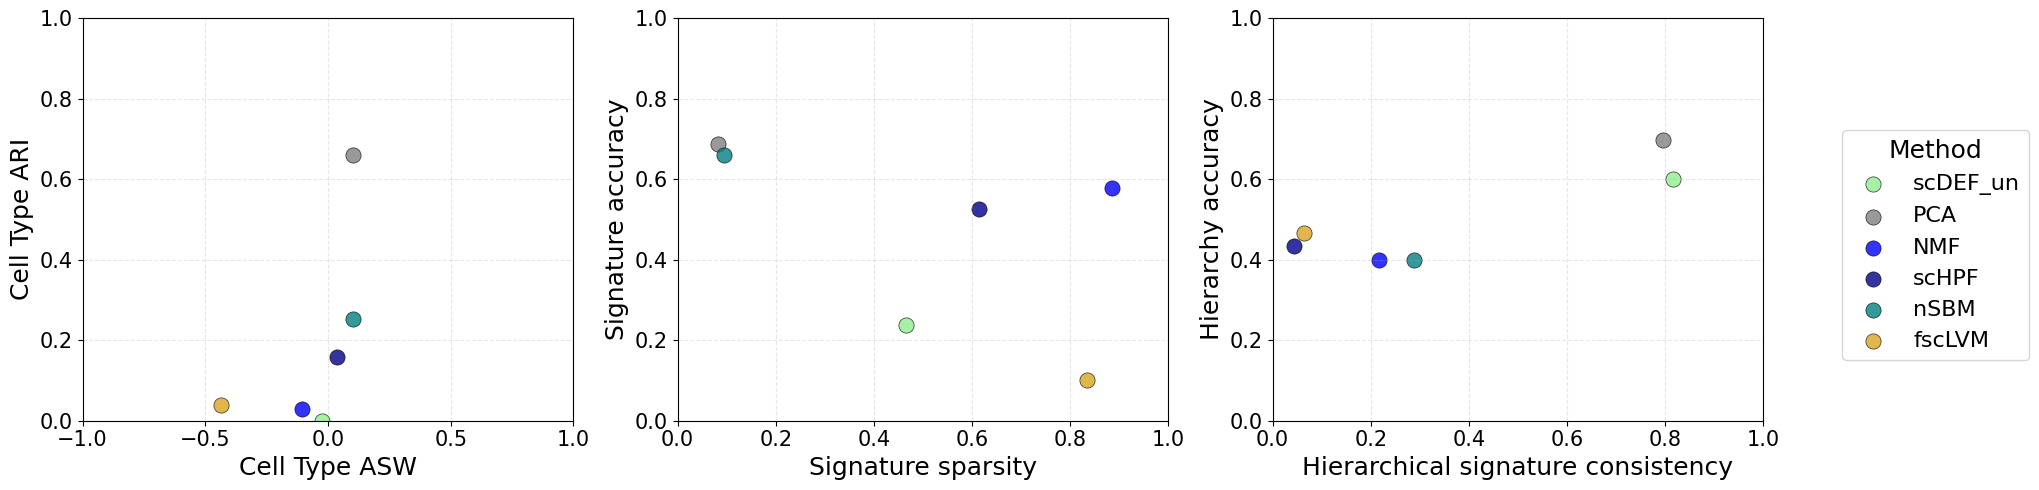

In [15]:
scores = pd.read_csv('../results/pbmcs3k/scores.csv')
plot_singlebatch(scores)
# plt.close(fig)  # Prevents duplicate figure display in some notebook environments


# PBMCs2B

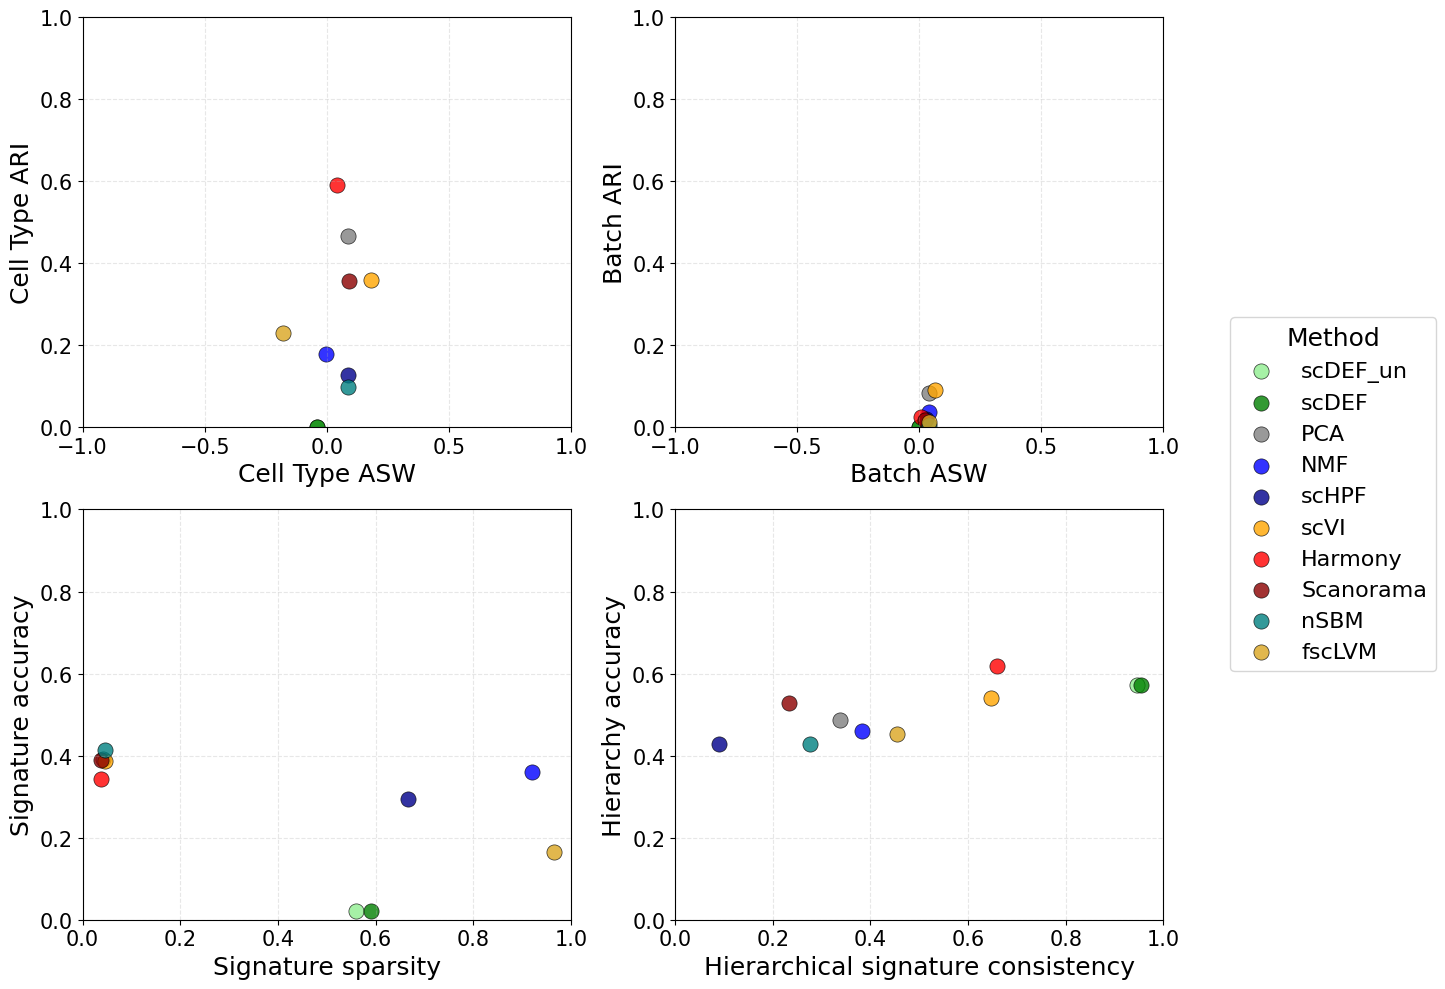

In [16]:
scores = pd.read_csv('../results/pbmcs2b/scores.csv')
plot_multibatch(scores, show=False)